In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

from helpers.makemore_helpers import make_char2idx_map, build_dataset

words = open(r'data\names.txt','r').read().splitlines()
char2idx = make_char2idx_map(words)
idx2char = {v: k for k, v in char2idx.items()}

block_size = 4


In [13]:
# Build the dataset
train_count = int(len(words) * 0.8)
n_1 = int(len(words) * 0.9)

x_train, y_train = build_dataset(words[:train_count], block_size, char2idx)
x_val, y_val = build_dataset(words[train_count:n_1], block_size, char2idx)
x_test, y_test = build_dataset(words[n_1:], block_size, char2idx)

total_train = len(x_train)
total_val = len(x_val)
total_test = len(x_test)

print(f"Sizes:", total_train, total_val, total_test)
print("Shapes:", x_train.shape, y_train.shape)


Sizes: 182778 22633 22735
Shapes: torch.Size([182778, 4]) torch.Size([182778])


In [149]:
# Set up parameters
rand_gen = torch.Generator().manual_seed(42)
embedding_size = 100

embedding_matrix = torch.randn((len(char2idx), 10,10), generator=rand_gen, requires_grad=True)
W1 = torch.randn((embedding_size * block_size, 300), generator=rand_gen, requires_grad=True)
b1 = torch.randn(300, generator=rand_gen, requires_grad=True)
W2 = torch.randn((300, len(char2idx)), generator=rand_gen, requires_grad=True)
b2 = torch.randn(len(char2idx), generator=rand_gen, requires_grad=True)

params = [embedding_matrix, W1, b1, W2, b2]

In [150]:
learning_rate_linear = torch.linspace(-3,0,1000)
learning_rate = 10**learning_rate_linear # learning rate will go from 10^-3 to 1

In [151]:
learning_rates = []
losses = []
iterations = []

In [163]:
batch_size = 256
epochs = 50000

for i in range(epochs):
    indices = torch.randint(0, total_train, (batch_size,))
    embedding = embedding_matrix[x_train[indices]]
    activation_1 = torch.tanh(
        embedding.view(-1,embedding_size * block_size) @ W1 + b1
    )
    logits = activation_1 @ W2 + b2
    loss = F.cross_entropy(logits, y_train[indices]) + 0.001 * (W1.norm() + W2.norm())

    for p in params:
        p.grad = None

    loss.backward(retain_graph=True)

    for p in params:
        p.data -= 0.01 * p.grad


    # learning_rates.append(learning_rate[i])
    losses.append(loss.item())
    iterations.append(i)

print(f"Final loss: {losses[-1]}")


Final loss: 2.4929871559143066


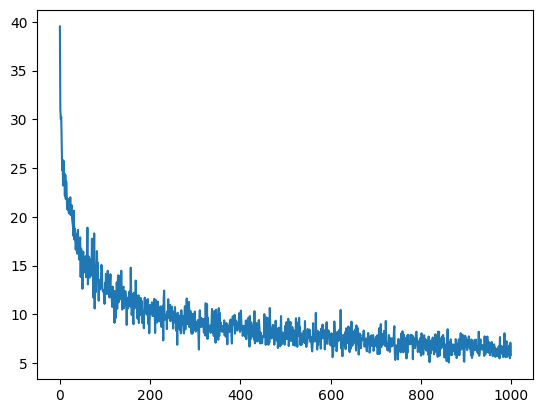

In [153]:
plt.plot(iterations, losses)

In [164]:
embedding = embedding_matrix[x_val]
activation_1 = torch.tanh(embedding.view(-1,embedding_size*block_size) @ W1 + b1)
logits = activation_1 @ W2 + b2
loss = F.cross_entropy(logits, y_val)
print(f"Loss: {loss.item():.4f}")

Loss: 2.8383


In [166]:
rand_gen = torch.Generator().manual_seed(42)

for _ in range(20):
    out = []
    context = [0] * block_size

    while True:
        emb = embedding_matrix[
            torch.tensor([context])
        ]

        act_1 = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = act_1 @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1,generator=rand_gen).item()
        context = context[1:] + [ix]
        
        if ix == 0:
            break

        out.append(ix)

    print(''.join([idx2char[i] for i in out]))

anuseyvampe
marian
davin
naysla
yana
kemarie
man
epiaciduen
dazcda
adaly
beres
alla
mikanya
adhvikia
anan
kaithan
tiyana
avorth
jenay
sogan
